In [75]:
import pandas as pd

In [76]:
population_df=pd.read_excel('../data/raw/population.xlsx',sheet_name='Table 1')
population = population_df.loc[8:2461]
pop_drop = population.dropna(axis='columns',how = 'all')
pop_drop.to_csv('../data/raw/population_2.csv', encoding='utf-8')

In [77]:
population=pd.read_csv('../data/raw/population_2.csv',header=0,names=['S/T code','S/T name', 'GCCSA code', 'GCCSA name',\
                                                                      'SA4 code', 'SA4 name', 'SA3 code', 'SA3 name', 'SA2 code',\
                                                                      'SA2 name', '2001','2002', '2003','2004', '2005','2006',
                                                                      '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',\
                                                                      '2016','2017','2018', '2019','2020','2021','change 2011-2021 number','change 2011-2021 %',\
                                                                      'Area km2','population density 2021(persons/km2)'])
VIC_population = population.loc[population['S/T name']=='Victoria']
select_population = VIC_population.loc[:, ['S/T name', 'SA2 name', '2001','2002', '2003','2004', '2005','2006',\
                                           '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',\
                                           '2016','2017','2018', '2019','2020','2021','change 2011-2021 number','change 2011-2021 %',\
                                           'Area km2','population density 2021(persons/km2)']] 

In [78]:
postcode_SA2 = pd.read_csv('../data/raw/postcode_info.csv')
attribute = postcode_SA2.loc[:,['Postcode','Longitude','Latitude','SA2 NAME 2016']]
drop_dup = attribute.drop_duplicates(subset=['Postcode'])
drop_dup = drop_dup.drop_duplicates(subset=['Longitude','Latitude'])
rename = drop_dup.rename(columns={'SA2 NAME 2016':'SA2 name'})

In [79]:
merge_data = pd.DataFrame(pd.merge(rename, select_population, on='SA2 name', how='inner'))

In [80]:
merge_data['change 2011-2021 %'] = merge_data['change 2011-2021 %']/100

In [81]:
merge_data['average change %'] = (merge_data['2002']/merge_data['2001']+merge_data['2003']/merge_data['2002']+merge_data['2004']/merge_data['2003']\
                                  +merge_data['2005']/merge_data['2004']+merge_data['2006']/merge_data['2005']+merge_data['2007']/merge_data['2006']\
                                  +merge_data['2008']/merge_data['2007']+merge_data['2009']/merge_data['2008']+merge_data['2010']/merge_data['2009']\
                                  +merge_data['2011']/merge_data['2010']+merge_data['2012']/merge_data['2011']+merge_data['2013']/merge_data['2012']\
                                  +merge_data['2014']/merge_data['2013']+merge_data['2015']/merge_data['2014']+merge_data['2016']/merge_data['2015']\
                                  +merge_data['2017']/merge_data['2016']+merge_data['2018']/merge_data['2017']+merge_data['2019']/merge_data['2018']\
                                  +merge_data['2020']/merge_data['2019']+merge_data['2021']/merge_data['2020'])/20

In [82]:
merge_data["2022"]=(merge_data["2021"]*merge_data["average change %"]).round()
merge_data["2023"]=(merge_data["2022"]*merge_data["average change %"]).round()
merge_data["2024"]=(merge_data["2023"]*merge_data["average change %"]).round()

In [83]:
merge_data

,Postcode,Longitude,Latitude,SA2 name,S/T name,2001,2002,2003,2004,2005,...,2020,2021,change 2011-2021 number,change 2011-2021 %,Area km2,population density 2021(persons/km2),average change %,2022,2023,2024
0,3002,144.982207,-37.818517,East Melbourne,Victoria,3731,3859,4243,4460,4495,...,5378,4962,-276,-0.053,2.9,1711.2,1.014927,5036.0,5111.0,5187.0
1,3005,144.950858,-37.824608,Docklands,Victoria,154,926,1913,3089,3779,...,16678,15942,9746,1.573,2.4,6522.9,1.422278,22674.0,32249.0,45867.0
2,3008,144.948039,-37.814719,Docklands,Victoria,154,926,1913,3089,3779,...,16678,15942,9746,1.573,2.4,6522.9,1.422278,22674.0,32249.0,45867.0
3,3010,144.961351,-37.796152,Parkville,Victoria,5332,5327,5253,5201,5157,...,8321,7446,895,0.137,4.0,1838.9,1.017541,7577.0,7710.0,7845.0
4,3050,144.954581,-37.800324,Parkville,Victoria,5332,5327,5253,5201,5157,...,8321,7446,895,0.137,4.0,1838.9,1.017541,7577.0,7710.0,7845.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,3990,145.501279,-38.455399,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,...,25631,26723,6327,0.310,728.8,36.7,1.021019,27285.0,27859.0,28445.0
588,3991,145.466781,-38.483041,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,...,25631,26723,6327,0.310,728.8,36.7,1.021019,27285.0,27859.0,28445.0
589,3992,145.534315,-38.569135,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,...,25631,26723,6327,0.310,728.8,36.7,1.021019,27285.0,27859.0,28445.0
590,3995,145.630713,-38.578071,Wonthaggi - Inverloch,Victoria,17647,17801,17956,18117,18250,...,25631,26723,6327,0.310,728.8,36.7,1.021019,27285.0,27859.0,28445.0


In [84]:
merge_data.to_csv('../data/curated/population_postcode_SA2.csv')

In [85]:
long_table=merge_data.melt(id_vars=["Postcode"],var_name="Year",value_name="Population") 
long_table=long_table.sort_values(by=["Postcode","Year","Population"],ascending=True) 
select_year = long_table.loc[(long_table['Year']=='2022')|(long_table['Year']=='2023')|(long_table['Year']=='2024')]
select_year

,Postcode,Year,Population
17760,3002,2022,5036.0
18352,3002,2023,5111.0
18944,3002,2024,5187.0
17761,3005,2022,22674.0
18353,3005,2023,32249.0
...,...,...,...
18518,8004,2023,16448.0
19110,8004,2024,16665.0
18036,8010,2022,11039.0
18628,8010,2023,11250.0


In [86]:
len(select_year)

1776

In [87]:
len(merge_data)

592

In [88]:
select_year.loc[select_year['Postcode']==3002]

,Postcode,Year,Population
17760,3002,2022,5036.0
18352,3002,2023,5111.0
18944,3002,2024,5187.0


In [89]:
for i in len(select_year):
    if select_year.loc[select_year['Postcode']==select_year['Postcode']]

SyntaxError: invalid syntax (222126972.py, line 2)

In [90]:
select_year.iloc[6:9]

,Postcode,Year,Population
17762,3008,2022,22674.0
18354,3008,2023,32249.0
18946,3008,2024,45867.0


<function matplotlib.pyplot.show(close=None, block=None)>

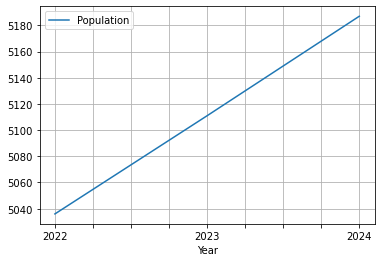

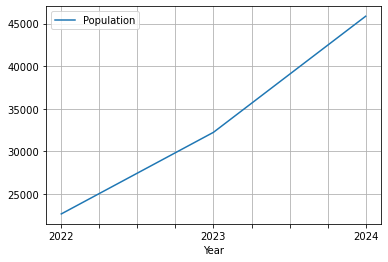

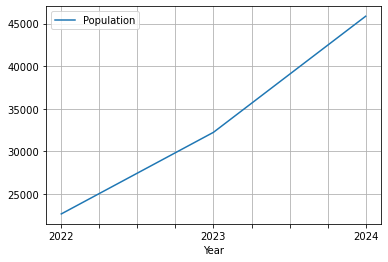

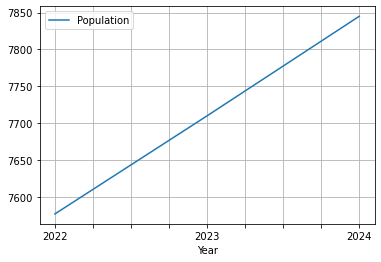

In [91]:
import matplotlib.pyplot as plt
import numpy as np
select_year.head(3).plot(x='Year', y='Population', kind='line', grid=True)
plt.show
select_year.iloc[3:6].plot(x='Year', y='Population', kind='line', grid=True)
plt.show
select_year.iloc[6:9].plot(x='Year', y='Population', kind='line', grid=True)
select_year.iloc[9:12].plot(x='Year', y='Population', kind='line', grid=True)
plt.show

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot([2022,2023,2024],merge_data[['2022','2023','2024']], kind='line', grid=True)
plt.show

In [ ]:

postcode=merge_data.loc[:,'Postcode']
pop_2022=merge_data.loc[:,'2022']
pop_2023=merge_data.loc[:,'2023']
pop_2024=merge_data.loc[:,'2024']
plt.figure(figsize=(15, 8), dpi=80)


In [92]:
import urllib.request
import zipfile
import pandas as pd
import geopandas as gpd
filename='../data/raw/VIC_map.zip'
urllib.request.urlretrieve("https://www.abs.gov.au/statistics/standards/australian-statistical-geography-standard-asgs-edition-3/jul2021-jun2026/access-and-downloads/digital-boundary-files/POA_2021_AUST_GDA94_SHP.zip", filename)
# unzip the file
with zipfile.ZipFile(filename,'r') as zip_ref:
    zip_ref.extractall("../data/raw/")

In [93]:
sf = gpd.read_file("../data/raw/POA_2021_AUST_GDA94.shp")
sf_postcode = sf[((sf["POA_CODE21"] >= "3000")\
                & (sf["POA_CODE21"] <= "3999"))\
                | ((sf["POA_CODE21"] >= "8000")\
                & (sf["POA_CODE21"] <= "8999"))]

In [94]:
sf_postcode.head()

,POA_CODE21,POA_NAME21,AUS_CODE21,AUS_NAME21,AREASQKM21,LOCI_URI21,SHAPE_Leng,SHAPE_Area,geometry
672,3000,3000,AUS,Australia,2.4814,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.083491,0.000254,"POLYGON ((144.96138 -37.82051, 144.96062 -37.8..."
673,3002,3002,AUS,Australia,1.8557,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.059488,0.000190,"POLYGON ((144.98978 -37.81907, 144.98973 -37.8..."
674,3003,3003,AUS,Australia,6.5822,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.139928,0.000673,"POLYGON ((144.95267 -37.81282, 144.95191 -37.8..."
675,3004,3004,AUS,Australia,4.0421,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.137947,0.000414,"POLYGON ((144.98000 -37.84423, 144.98031 -37.8..."
676,3006,3006,AUS,Australia,1.8542,http://linked.data.gov.au/dataset/asgsed3/POA/...,0.066882,0.000190,"POLYGON ((144.96138 -37.82051, 144.96303 -37.8..."


In [123]:
merge_data = merge_data[['Postcode', '2023']]
merge_data.head()

,Postcode,2023
0,3002,5111.0
1,3005,32249.0
2,3008,32249.0
3,3010,7710.0
4,3050,7710.0


In [95]:
#select_year_2023 = select_year.loc[select_year['Year']=='2023']
#select_year_2023.head()

,Postcode,Year,Population
18352,3002,2023,5111.0
18353,3005,2023,32249.0
18354,3008,2023,32249.0
18355,3010,2023,7710.0
18358,3011,2023,18158.0


In [124]:
merge_data.dtypes

Postcode      int64
2023        float64
dtype: object

In [125]:

merge_data['Postcode'] = merge_data['Postcode'].apply(str)

In [126]:
sf_postcode.dtypes

POA_CODE21      object
POA_NAME21      object
AUS_CODE21      object
AUS_NAME21      object
AREASQKM21     float64
LOCI_URI21      object
SHAPE_Leng     float64
SHAPE_Area     float64
geometry      geometry
dtype: object

In [129]:
result = pd.merge(merge_data, sf_postcode, how='left', left_on='Postcode', right_on='POA_CODE21')
result.shape

(592, 11)

In [133]:
# create a JSON 
geoJSON = result[['geometry']].to_json()

# print the first 300 chars of the json
print(geoJSON[:300])

/Users/liuyiqun/opt/anaconda3/lib/python3.9/site-packages/pandas/io/json/_json.py:172: ShapelyDeprecationWarning: The 'array_interface_base' property is deprecated and will be removed in Shapely 2.0.
  return dumps(
IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by GeometryCollection

IllegalArgumentException: Operation not supported by G

OverflowError: Maximum recursion level reached

In [ ]:
import folium
_map = folium.Map(location=[36.9848, 143.3906], tiles="Stamen Terrain", zoom_start=2)

# refer to the folium documentations on how to plot aggregated data.
_map.add_child(folium.Choropleth(
    geo_data=geoJSON,
    name='choropleth',
))
_map

In [132]:
m = folium.Map(location=[36.9848, 143.3906], tiles="Stamen Terrain", zoom_start=10)

# refer to the folium documentations on more information on how to plot aggregated data.
c = folium.Choropleth(
    geo_data=geoJSON, # geoJSON 
    name='choropleth', # name of plot
    data=result, # data source
    columns=['Postcode','2023'], # the columns required
    key_on= 'properties.Postcode', # this is from the geoJSON's properties
    fill_color='YlOrRd', # color scheme
    nan_fill_color='black',
    legend_name='population'
)

c.add_to(m)

m

ValueError: key_on `'properties.Postcode'` not found in GeoJSON.